In [13]:
"""
This code is designed to plot the black hole mass vs stellar mass of galaxies in different simulations,
as drawn from the catalogue of Melanie Habouzit
@author: clara
"""
import numpy as np
import matplotlib.pyplot as plt
import math
import csv
import pandas as pd
import os


In [14]:
#unused for the moment

folder_list = ['../../Simulation Data/EAGLE','../Simulation Data/HAGN','../Simulation Data/Illustris','../Simulation Data/TNG-100','../Simulation Data/TNG-300','../Simulation Data/SIMBA']

def read_folder(csv_folder): 
   files = os.listdir(csv_folder)
   df = []
   for f in files:
     print(f)
     csv_file = csv_folder + "/" + f
     df.append(pd.read_csv(csv_file))
   df_full = pd.concat(df, ignore_index=True)
   return df_full

EAGLE
[48146060.   30809586.   73755376.   ...  1141612.8    539826.9
   372852.66] [4.00042150e+10 4.21227720e+10 3.60579600e+10 ... 1.12651994e+09
 1.56528410e+09 2.06847872e+09]
HAGN
[9.27176132e+09 1.17228050e+09 1.15667419e+09 ... 1.75877884e+06
 2.08678748e+05 4.47476767e+06] [1.537e+12 3.687e+11 3.964e+11 ... 9.586e+08 1.258e+09 1.451e+09]
Illustris
[1.28833175e+09 1.40835330e+09 1.13286067e+09 ... 1.44346899e+05
 1.44184805e+05 2.96128245e+05] [4.38301970e+11 2.84316784e+11 3.74201861e+11 ... 6.16629153e+08
 5.13364053e+08 5.40218157e+08]
TNG100
[1.85293770e+09 2.62012105e+09 5.08089755e+08 ... 1.18098612e+06
 1.18098760e+06 1.18098612e+06] [3.79849424e+11 4.25932979e+11 1.20446413e+11 ... 5.82142014e+06
 3.46167700e+06 3.67299970e+06]
TNG300
[1.89337172e+10 4.04904045e+09 1.79889283e+09 ... 1.18146885e+06
 1.18117213e+06 1.18098760e+06] [2.56163271e+12 5.64524653e+11 2.46786242e+11 ... 2.71814290e+07
 3.01904340e+07 2.67705934e+07]
SIMBA
[1.70298655e+10 1.92742420e+10 1.641690

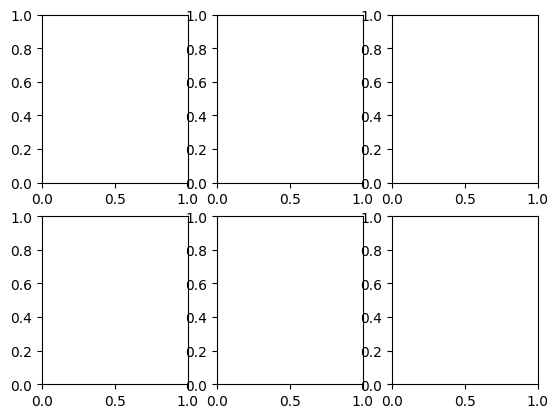

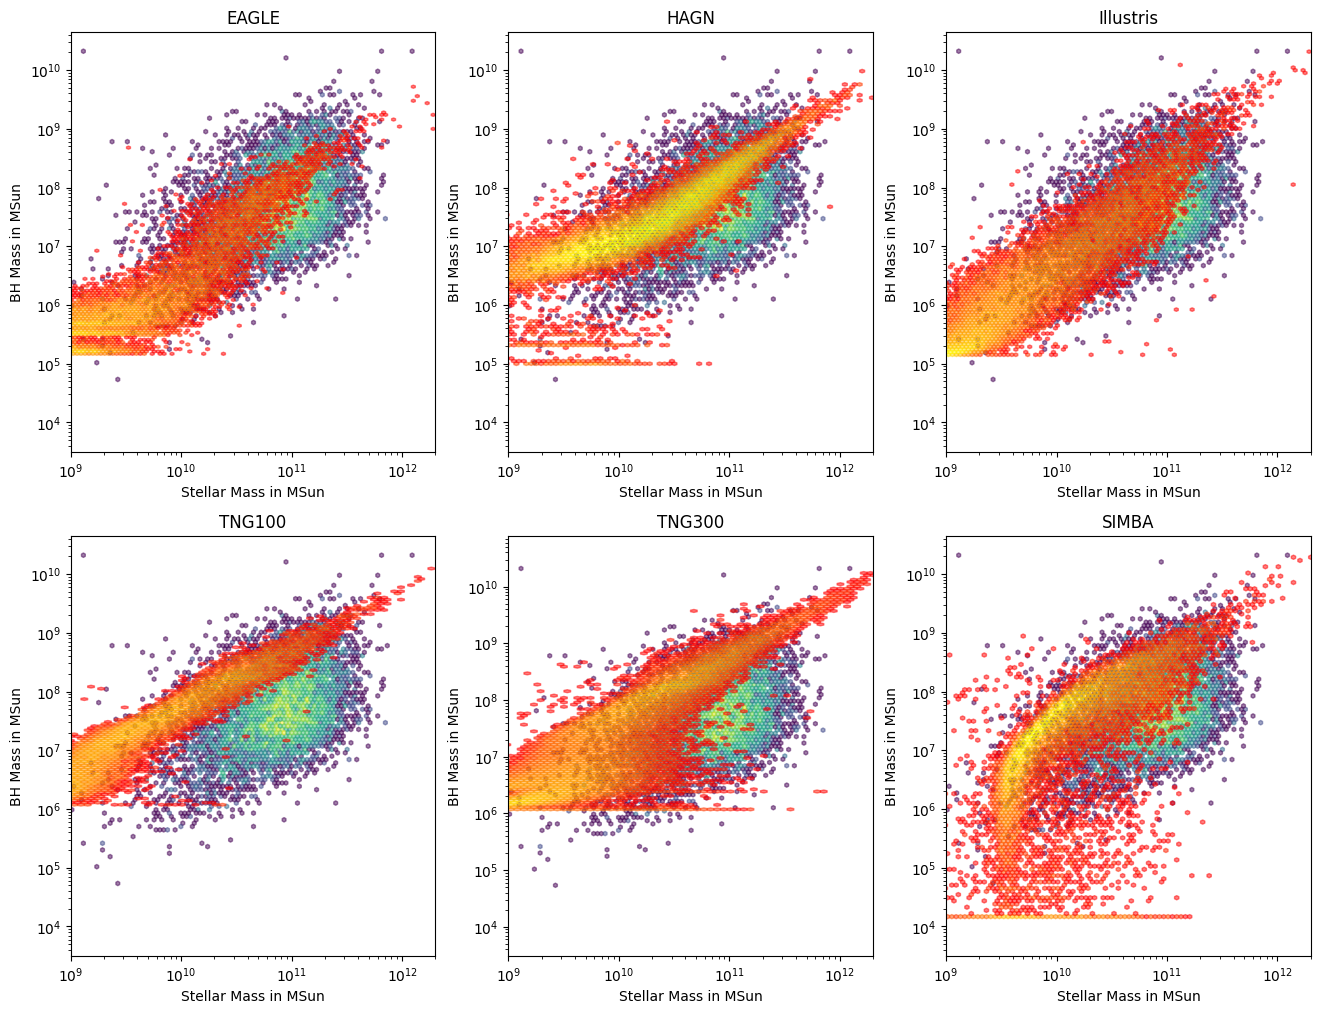

In [60]:
#observations
df_data = pd.read_csv("../../Observation Data\Data_observations_z0.txt",header=0,sep="\s+| |  ",
                       names=['stellar mass','massBH'])
data_stellar_mass = 10**df_data['stellar mass'].to_numpy()
data_massBH = 10**df_data['massBH'].to_numpy()
    

#simulations

sim_list = np.array(['EAGLE','HAGN','Illustris','TNG100','TNG300','SIMBA'])
snapshot_num = np.array([28,761,135,99,99,151])
#sim_list = np.array(['EAGLE'])
#snapshot_num = np.array([28])
filename = []
x = 0
cols = 3 
rows = 2
plt.subplots(2,3)
i = 0
j = 0
fig, axes = plt.subplots(rows, cols, figsize=(16, 12))
while x < len(snapshot_num):
    filename.append("../../Simulation Data/"+str(sim_list[x])+"/catalog_Habouzit_"+str(sim_list[x])+"_out_"+str(snapshot_num[x])+"_epsr01_correctlum_units.txt")
    
    df = pd.read_csv(filename[x],header=0,sep="\s+| |  ",
                       names=['redshift','stellar mass','radius','SFR','positionX', 'positionY', 'positionZ','noBH','massBH','BHdot','bolLum','XrayLum','sfr2','pos2'])
    
    stellar_mass = df['stellar mass'].to_numpy()
    massBH = df['massBH'].to_numpy()


    #axes[i][j].plot(stellar_mass, massBH, "+", label=str(sim_list[x]),color='orange')

    zero_rows = (massBH <= 0)

    print(sim_list[x])
    if np.size(np.where(zero_rows)[0]) != 0:
        
        first_invalid = np.where(zero_rows)[0][0]
        massBH = np.delete(massBH, np.where(zero_rows)[0])
        stellar_mass = np.delete(stellar_mass, np.where(zero_rows)[0])
    print(massBH,stellar_mass)
    axes[i][j].hexbin(data_stellar_mass, data_massBH,bins='log', xscale='log', yscale='log', alpha = 0.5)
    axes[i][j].hexbin(stellar_mass, massBH,bins='log', xscale='log', yscale='log', alpha= 0.5, cmap='autumn')
    
    axes[i][j].set_xlabel(r'Stellar Mass in MSun')
    axes[i][j].set_xlim([10**9, 2*10**12])
    axes[i][j].set_ylabel(r'BH Mass in MSun')
    axes[i][j].set_xscale('log')
    axes[i][j].set_yscale('log')
    axes[i][j].set_title(str(sim_list[x]))
    #axes[i][j].legend()
    x += 1
    j += 1
    if x == 3:
        i +=1
        j = j-3


plt.savefig('Figures/stellarMass_vs_BHMass_withdata')
plt.show()

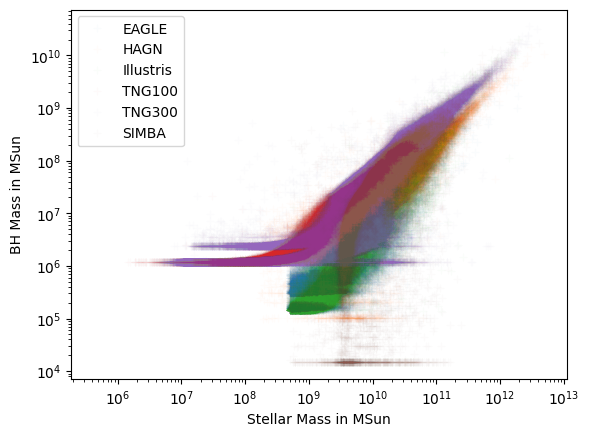

In [34]:

sim_list = np.array(['EAGLE','HAGN','Illustris','TNG100','TNG300','SIMBA'])
snapshot_num = np.array([28,761,135,99,99,151])
filename = []
x = 0
while x < len(snapshot_num):
    filename.append("../Simulation Data/"+str(sim_list[x])+"/catalog_Habouzit_"+str(sim_list[x])+"_out_"+str(snapshot_num[x])+"_epsr01_correctlum_units.txt")
    
    df = pd.read_csv(filename[x],header=0,sep="\s+| |  ",
                       names=['redshift','stellar mass','radius','SFR','positionX', 'positionY', 'positionZ','noBH','massBH','BHdot','bolLum','XrayLum','sfr2','pos2'])
    
    stellar_mass = df['stellar mass'].to_numpy()
    massBH = df['massBH'].to_numpy()
    plt.loglog(stellar_mass, massBH, "+", label=str(sim_list[x]),alpha=0.02)
    x += 1
    
plt.xlabel(r'Stellar Mass in MSun')
plt.ylabel(r'BH Mass in MSun')
plt.legend()
plt.savefig('stellarMass_vs_BHMass_oneplot')
plt.show()
